# Data Cleaning

In [179]:
# importing pandas for data analysis requisite libraries
import pandas as pd
# keeping future warnings from showing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [180]:
# reading in the scraped data from SCRAPSFROMTHELOFT
comedy = pd.read_csv('comedy_v1.csv', sep='\t') # data is tab separated to avoid issues with commas in the text

In [181]:
# checking 10 random rows
comedy.sample(10, replace=False)

,link,unique_id,date,title,text
193,https://scrapsfromtheloft.com/comedy/mo-amer-t...,mo-amer-the-vagabond-transcript,"\t\t\t\t\t\t\t\t\t\tOctober 11, 2018\t\t\t\t\t",Mo Amer: The Vagabond (2018) – Full Transcript,A NETFLIX ORIGINAL COMEDY SPECIAL [audience ch...
117,https://scrapsfromtheloft.com/comedy/dan-soder...,dan-soder-son-of-a-gary-transcript,"\t\t\t\t\t\t\t\t\t\tJanuary 23, 2020\t\t\t\t\t",Dan Soder: Son of a Gary (2019) – Full Transcript,"Announcer: Ladies and gentlemen, Dan Soder! (c..."
24,https://scrapsfromtheloft.com/comedy/mike-epps...,mike-epps-under-rated-never-faded-x-rated-tran...,"\t\t\t\t\t\t\t\t\t\tMay 26, 2022\t\t\t\t\t",Mike Epps: Under Rated… Never Faded & X-Rated ...,[Cheers and applause] Hoo! Hoo! Hoo! Hoo! Hoo!...
45,https://scrapsfromtheloft.com/comedy/tom-papa-...,tom-papa-youre-doing-great-transcript,"\t\t\t\t\t\t\t\t\t\tJune 28, 2021\t\t\t\t\t",Tom Papa: You’re Doing Great! (2020) – Transcript,"[applause, whooping] [presenter] Ladies and ge..."
170,https://scrapsfromtheloft.com/comedy/amy-schum...,amy-schumer-growing-transcript,"\t\t\t\t\t\t\t\t\t\tMarch 23, 2019\t\t\t\t\t",Amy Schumer: Growing (2019) – Full Transcript,"Yes! Thank you so much, Chicago. Thank you. I ..."
367,https://scrapsfromtheloft.com/comedy/mike-birb...,mike-birbiglia-thank-god-jokes-2017-full-trans...,"\t\t\t\t\t\t\t\t\t\tJuly 26, 2017\t\t\t\t\t",Mike Birbiglia: Thank God for Jokes (2017) – T...,"[crowd chattering] Hi, I’m Jimmy Kimmel. Can I..."
343,https://scrapsfromtheloft.com/comedy/kevin-har...,kevin-hart-seriously-funny-2010-full-transcript,"\t\t\t\t\t\t\t\t\t\tSeptember 2, 2017\t\t\t\t\t",Kevin Hart: Seriously Funny (2010) – Transcript,"Whoa! Yeah, Cleveland. What’s up, Cleveland? H..."
46,https://scrapsfromtheloft.com/comedy/tom-papa-...,tom-papa-human-mule-transcript,"\t\t\t\t\t\t\t\t\t\tJune 26, 2021\t\t\t\t\t",Tom Papa: Human Mule (2016) – Transcript,aired December 2016 [plodding music] ♪ [cheers...
244,https://scrapsfromtheloft.com/comedy/stewart-l...,stewart-lee-90s-comedian-2006-full-transcript,"\t\t\t\t\t\t\t\t\t\tMarch 6, 2018\t\t\t\t\t",STEWART LEE: 90s COMEDIAN (2006) – Full Transc...,"Recorded on 10 March 2006 at Chapter Arts, Can..."
313,https://scrapsfromtheloft.com/comedy/gabriel-i...,gabriel-iglesias-im-sorry-for-what-i-said-when...,"\t\t\t\t\t\t\t\t\t\tNovember 6, 2017\t\t\t\t\t",GABRIEL IGLESIAS: I’M SORRY FOR WHAT I SAID WH...,[audience chanting] Fluffy! Fluffy! Fluffy! Fl...


In [182]:
# checking sum stats for the lengths of the text columns--a small minimum would indicate at least one instance of a failed scrape
comedy['text'].str.len().describe() # looks good--smallest length is 2584

count      416.000000
mean     43809.841346
std      17850.147821
min       2584.000000
25%      37267.750000
50%      46336.000000
75%      55466.250000
max      92222.000000
Name: text, dtype: float64

In [183]:
# removing text between brackets as this was added on the site to document crowd reactions
# ex: [Audience Applause] or [Audience Laughs Loudly]
comedy['text'] = comedy['text'].str.replace(r'\[.*?\]', '')

In [184]:
# checking the sum stats for the lengths of the text columns after removing the bracketed text
comedy['text'].str.len().describe() # clearly that bracketed text was common--the mean text length decreased significantly

count      416.000000
mean     42849.264423
std      17599.456433
min       2572.000000
25%      35948.750000
50%      45251.500000
75%      53690.500000
max      91585.000000
Name: text, dtype: float64

In [185]:
# creating a new column, year, by extracting the year from the title column
comedy['year'] = comedy['title'].str.extract(r'(\d{4})') # regular expression pattern matching 4 consecutive instances of digits [0-9]
comedy['year'].sample(20, replace=False) # looks good

357    2013
301    2014
158    2015
72     2020
5      2023
199     NaN
51     2021
137     NaN
121    2015
274    2000
262    2015
189    1998
376    2017
16     2022
263    2004
284    2013
9      2022
209    2018
308    2010
201    2015
Name: year, dtype: object

In [186]:
# checking how many rows have a missing `year` from the total
pct_missing_year = round(comedy['year'].isnull().sum()/len(comedy), 4) * 100
print(f"{pct_missing_year}% of rows do not have an entry in the year column")

5.29% of rows do not have an entry in the year column


In [187]:
# checking the rows with missing year values
comedy[comedy["year"].isna()]

,link,unique_id,date,title,text,year
44,https://scrapsfromtheloft.com/comedy/dave-chap...,dave-chappelle-846-transcript,"\t\t\t\t\t\t\t\t\t\tAugust 5, 2021\t\t\t\t\t",Dave Chappelle: 8:46 – Transcript,8:46 is a performance special by comedian Dave...,NaN
53,https://scrapsfromtheloft.com/comedy/george-ca...,george-carlin-politically-correct-language,"\t\t\t\t\t\t\t\t\t\tFebruary 18, 2021\t\t\t\t\t",George Carlin: Politically Correct Language,"I know I’m a little late with this, but I’d li...",NaN
55,https://scrapsfromtheloft.com/comedy/chris-roc...,chris-rock-total-blackout-the-tamborine-extend...,"\t\t\t\t\t\t\t\t\t\tJanuary 15, 2021\t\t\t\t\t",Chris Rock Total Blackout: The Tamborine Exten...,"Were you at the, uh, White House party? Yes,...",NaN
77,https://scrapsfromtheloft.com/comedy/bill-hick...,bill-hicks-censored-david-letterman-transcript,"\t\t\t\t\t\t\t\t\t\tJuly 5, 2020\t\t\t\t\t",BILL HICKS: THE CENSORED SEVEN MINUTES ON LATE...,"On October 1, 1993, Hicks was scheduled to app...",NaN
83,https://scrapsfromtheloft.com/comedy/doug-stan...,doug-stanhope-fear-of-an-empty-bed-transcript,"\t\t\t\t\t\t\t\t\t\tJune 9, 2020\t\t\t\t\t",DOUG STANHOPE: FEAR OF AN EMPTY BED [TRANSCRIPT],"Comedy Central, Oct 4, 2016 After a bad breaku...",NaN
103,https://scrapsfromtheloft.com/comedy/dave-alle...,dave-allen-first-day-at-school-transcript,"\t\t\t\t\t\t\t\t\t\tApril 30, 2020\t\t\t\t\t",DAVE ALLEN: FIRST DAY AT CATHOLIC SCHOOL [TRAN...,Dave Allen on his first day at Catholic school...,NaN
106,https://scrapsfromtheloft.com/comedy/george-ca...,george-carlin-indian-drill-sergeant-transcript,"\t\t\t\t\t\t\t\t\t\tApril 13, 2020\t\t\t\t\t",George Carlin: The Indian Drill Sergeant – Tra...,"In 1965 “The Indian Sergeant,” was emerging as...",NaN
109,https://scrapsfromtheloft.com/comedy/bert-krei...,bert-kreischer-fighting-a-bear-transcript,"\t\t\t\t\t\t\t\t\t\tMarch 21, 2020\t\t\t\t\t",Bert Kreischer: Fighting A Bear [Transcript],"The machine, Mr. Bert Kreischer, everybody. Le...",NaN
137,https://scrapsfromtheloft.com/comedy/dave-chap...,dave-chappelle-sticks-stones-epilogue-punchlin...,"\t\t\t\t\t\t\t\t\t\tAugust 29, 2019\t\t\t\t\t",Dave Chappelle: Sticks & Stones | Epilogue: Th...,Tacked onto the end of the Dave Chappelle’s St...,NaN
138,https://scrapsfromtheloft.com/comedy/brazil-co...,brazil-corruption-amazon-hasan-minhaj,"\t\t\t\t\t\t\t\t\t\tAugust 26, 2019\t\t\t\t\t","Brazil, Corruption and the Amazon Rainforest |...","On this episode of Patriot Act, Hasan breaks d...",NaN


In [188]:
# copying the comedy dataframe to a new dataframe
comedy_original = comedy.copy()

In [189]:
# dropping rows with missing year, assigning the result to 'comedy'
comedy = comedy_original.dropna(subset=['year'])

In [190]:
# checking the number of rows
len(comedy)

394

In [191]:
# removing transcripts that are spanish and italian translations of the originals (title will contain the word 'italian' or 'completa')
comedy = comedy[~comedy['title'].str.contains('italian')]
comedy = comedy[~comedy['title'].str.contains('completa')]
# re checking the number of rows
len(comedy)

386

In [192]:
# converting the year column to numeric
comedy['year'] = pd.to_numeric(comedy['year'])

In [193]:
# checking the 5 num sum of the year column
comedy['year'].describe()

count     386.000000
mean     2013.046632
std         9.899385
min      1963.000000
25%      2011.000000
50%      2016.000000
75%      2019.000000
max      2023.000000
Name: year, dtype: float64

<Axes: >

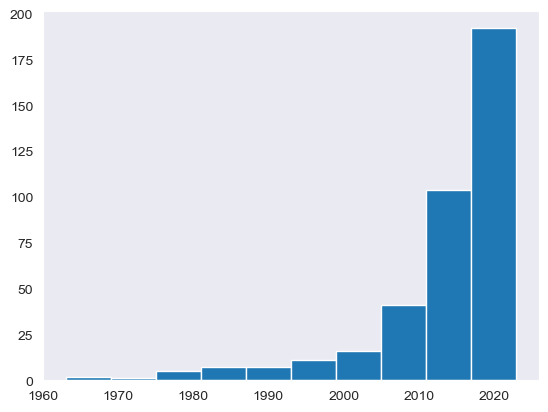

In [194]:
# checking the distribution of the year column
comedy['year'].hist(grid=False) # the data is heavily skewed to the right, most of the transcripts are from the 2010s and on

In [195]:
comedy.columns

Index(['link', 'unique_id', 'date', 'title', 'text', 'year'], dtype='object')

In [196]:
# subsetting the dataframe to only include the necessary columns: year, title, text
comedy = comedy[['year', 'title', 'text']]

In [197]:
# removing unwanted text from each title
# making a list of unwanted text items
to_remove = ["full transcript", "transcript", "|", "–", "[", "]"]
# iterating through the list and removing each item from the title column
for item in to_remove:
    comedy['title'] = comedy['title'].str.lower().str.replace(item, '')

In [198]:
# checking the results
comedy['title'].sample(10, replace=False)

174         ken jeong: you complete me, ho (2019)  
125               michelle wolf: joke show (2019)  
305        sarah silverman: jesus is magic (2005)  
61       craig ferguson: just being honest (2015)  
62            kevin hart: zero f**ks given (2020)  
151                  jo koy: comin’ in hot (2019)  
168              kevin hart: irresponsible (2019)  
22         norm macdonald: nothing special (2022)  
380                  louis c.k.: shameless (2007)  
239    george carlin: you are all diseased (1999)  
Name: title, dtype: object

In [199]:
comedy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    386 non-null    int64 
 1   title   386 non-null    object
 2   text    386 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.1+ KB


In [200]:
# checking rows where the title contains the word italian
comedy[comedy['title'].str.contains('italian')]

,year,title,text


In [201]:
# writing the cleaned dataframe to a csv file using the tab delimiter
comedy.to_csv('comedy_cleaned.csv', sep='\t', index=False)